In [1]:
#ECON 321 NEIU: PPP example
#I make no claim that I am that good at Python!
#This is not quite the same as the R example-it has a different order and may do a few different things
#There is lso much less detail in the graphics, for example

In [2]:
#Import and read data

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [8]:
data=pd.read_csv('https://sites.google.com/site/swhegerty/macroeconomic-data-analysis/PPPData.csv',index_col=0,parse_dates=True)

In [9]:
data.head()

,USCPI,CP0000EZ19M086NEST,USDperEUR
DATE,,,
1999-01-01,164.7,73.56,1.1591
1999-02-01,164.7,73.72,1.1203
1999-03-01,164.8,73.97,1.0886
1999-04-01,165.9,74.23,1.0701
1999-05-01,166.0,74.28,1.0630


In [10]:
#Examine and plot

In [11]:
data.columns=['USCPI','EUCPI','EXR']

In [12]:
data.head()

,USCPI,EUCPI,EXR
DATE,,,
1999-01-01,164.7,73.56,1.1591
1999-02-01,164.7,73.72,1.1203
1999-03-01,164.8,73.97,1.0886
1999-04-01,165.9,74.23,1.0701
1999-05-01,166.0,74.28,1.0630


In [13]:
#Here us the US/EU price ratio-I also plot it (US has faster inflation?)
PRATIO=pd.DataFrame(data['USCPI']/data['EUCPI'])

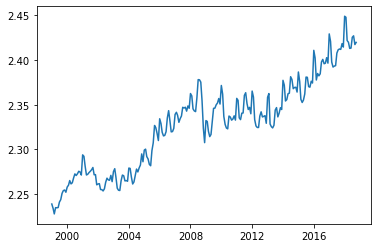

In [14]:
#Plot price ratio, then each CPI separately to examine
plt.plot(PRATIO)

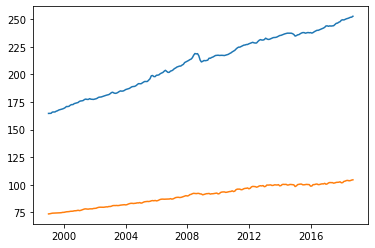

In [15]:
plt.plot(data[['USCPI','EUCPI']])

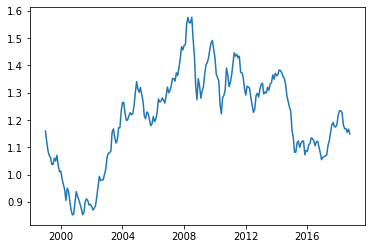

In [16]:
#Plot the exchange rate itself
plt.plot(data['EXR'])

In [17]:
# One lag inflation (month-on-month): not used here, but important in general
usinf1=100*np.diff(np.log(data['USCPI']))
euinf1=100*np.diff(np.log(data['EUCPI']))
euapp1=100*np.diff(np.log(data['EXR']))
infdiff1=usinf1-euinf1

In [18]:
#Make a dataframe and name columns
perc1=pd.concat([pd.DataFrame(usinf1),pd.DataFrame(euinf1),pd.DataFrame(infdiff1),pd.DataFrame(euapp1)],axis=1)
perc1.columns=['USINF1','EUINF1','INFDIFF1','EUAPP1']

In [19]:
perc1.head()

,USINF1,EUINF1,INFDIFF1,EUAPP1
0,0.000000,0.217273,-0.217273,-3.404734
1,0.060698,0.338547,-0.277849,-2.870404
2,0.665258,0.350878,0.314380,-1.714036
3,0.060259,0.067336,-0.007076,-0.665700
4,0.000000,-0.013463,0.013463,-2.408837


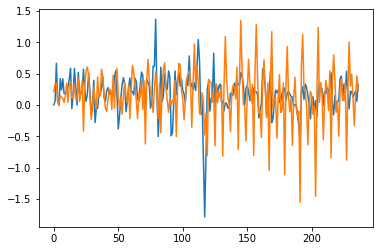

In [20]:
plt.plot(perc1[['USINF1','EUINF1']])

In [21]:
#12-month inflation rates (year on year)
# 4 variables, then a dataframe
inf12=data['USCPI'].shift(12)
inf12=100*(data['USCPI']-inf12)/inf12
usinf12=inf12.dropna()
del inf12

In [22]:
inf12=data['EUCPI'].shift(12)
inf12=100*(data['EUCPI']-inf12)/inf12
euinf12=inf12.dropna()
del inf12

In [23]:
inf12=data['EXR'].shift(12)
inf12=100*(data['EXR']-inf12)/inf12
euapp12=inf12.dropna()
del inf12

In [24]:
infdiff12=usinf12-euinf12

In [25]:
perc12=pd.concat([pd.DataFrame(usinf12),pd.DataFrame(euinf12),pd.DataFrame(infdiff12),pd.DataFrame(euapp12)],axis=1)

In [26]:
perc12.columns=['USINF12','EUINF12','INFDIFF12','EUAPP12']

In [27]:
perc12.head()

,USINF12,EUINF12,INFDIFF12,EUAPP12
DATE,,,,
2000-01-01,2.792957,1.930397,0.862560,-12.595980
2000-02-01,3.217972,2.034726,1.183246,-12.219941
2000-03-01,3.762136,2.054887,1.707249,-11.418335
2000-04-01,3.013864,1.805200,1.208664,-11.699841
2000-05-01,3.132530,1.857835,1.274695,-14.778928


In [28]:
#Correlations differ by measure
perc1.corr()

,USINF1,EUINF1,INFDIFF1,EUAPP1
USINF1,1.000000,0.215997,0.446498,0.262090
EUINF1,0.215997,1.000000,-0.777220,0.054175
INFDIFF1,0.446498,-0.777220,1.000000,0.119254
EUAPP1,0.262090,0.054175,0.119254,1.000000


In [29]:
perc12.corr()

,USINF12,EUINF12,INFDIFF12,EUAPP12
USINF12,1.000000,0.795742,0.654820,0.337871
EUINF12,0.795742,1.000000,0.063338,0.280227
INFDIFF12,0.654820,0.063338,1.000000,0.207057
EUAPP12,0.337871,0.280227,0.207057,1.000000


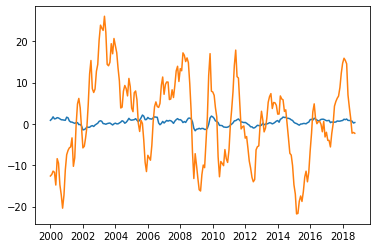

In [30]:
#Note that EXR varies more than INFDIFF
plt.plot(perc12.iloc[:,[2,3]])

In [31]:
#Calculate Coefficients of Variation
perc12.std()

USINF12       1.272949
EUINF12       0.964012
INFDIFF12     0.772494
EUAPP12      10.250898
dtype: float64

In [32]:
perc12.mean()

USINF12      2.192406
EUINF12      1.766533
INFDIFF12    0.425872
EUAPP12      1.099637
dtype: float64

In [33]:
cvs=perc12.std()/perc12.mean()
cvs

USINF12      0.580618
EUINF12      0.545708
INFDIFF12    1.813910
EUAPP12      9.322075
dtype: float64

In [34]:
#Ratio of CVs: app/infdiff 
round(cvs.iloc[3]/cvs.iloc[2],2)

5.14

In [35]:
#Multiply INFDIFF x 5
perc12b=perc12
perc12b.iloc[:,2]=5*perc12b.iloc[:,2]

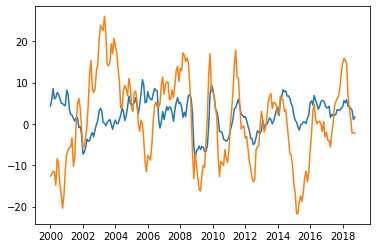

In [36]:
plt.plot(perc12b.iloc[:,[2,3]])

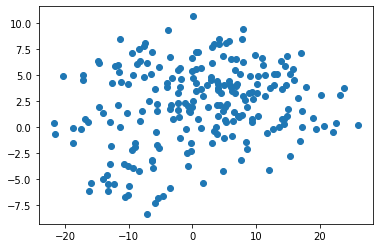

In [37]:
#Scatterplot #1
y=perc12['EUAPP12']
x=perc12['INFDIFF12']
plt.scatter(y,x)

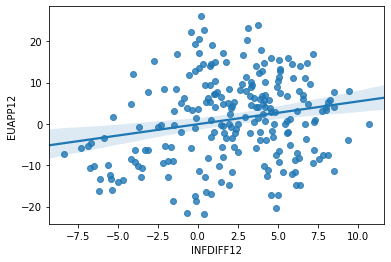

In [38]:
#Scatterplot #2: With regression line (using Seaborn)
import seaborn as sns
sns.regplot(x=x, y=y)

In [39]:
#Regress appreciation on inflation differential
import statsmodels.formula.api as sm

In [40]:
result = sm.ols(formula="EUAPP12 ~ INFDIFF12", data=perc12).fit()

In [41]:
print(result.params)

Intercept   -0.070499
INFDIFF12    0.549524
dtype: float64


In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                EUAPP12   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     10.03
Date:                Sun, 18 Oct 2020   Prob (F-statistic):            0.00175
Time:                        19:03:05   Log-Likelihood:                -841.21
No. Observations:                 226   AIC:                             1686.
Df Residuals:                     224   BIC:                             1693.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0705      0.764     -0.092      0.9

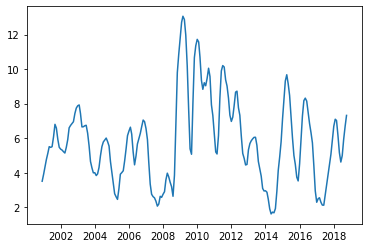

In [43]:
#Bonus: Calculate 12-month rolling standard deviation for Euro appreciation
rollsd12=perc12['EUAPP12'].rolling(window=12).std()
rollsd12=rollsd12.dropna()
plt.plot(rollsd12)